In [1]:
import numpy as np
from matplotlib import pyplot as plt   

In [2]:

w0_star = np.random.uniform(-1/4, 1/4)

w1_star = np.random.uniform(-1, 1)
w2_star = np.random.uniform(-1, 1)

w = np.array([w0_star, w1_star, w2_star])
w

array([ 0.05725218, -0.37765539, -0.52623538])

In [3]:
n = 100
x0 = np.ones(n)
x1 = np.random.uniform(-1, 1, n)
x2 = np.random.uniform(-1, 1, n)
x = np.column_stack((x0, x1, x2))
x

array([[ 1.        ,  0.02574857,  0.20103285],
       [ 1.        , -0.2433018 , -0.77033342],
       [ 1.        ,  0.11601347,  0.2594162 ],
       [ 1.        , -0.13646878, -0.75492609],
       [ 1.        ,  0.90640541, -0.33298916],
       [ 1.        ,  0.30343385,  0.81067141],
       [ 1.        , -0.03621904,  0.47762569],
       [ 1.        , -0.37670111,  0.0384242 ],
       [ 1.        ,  0.56997791, -0.60103385],
       [ 1.        ,  0.11365887, -0.38617976],
       [ 1.        ,  0.82198791, -0.33671705],
       [ 1.        , -0.2969533 , -0.23356954],
       [ 1.        ,  0.14207779, -0.12910128],
       [ 1.        , -0.56196858, -0.78848755],
       [ 1.        ,  0.50669147,  0.63188137],
       [ 1.        ,  0.88425585,  0.50341613],
       [ 1.        , -0.59429403,  0.59592852],
       [ 1.        , -0.34191016, -0.94306858],
       [ 1.        ,  0.82370919,  0.7487118 ],
       [ 1.        ,  0.06902612,  0.98432527],
       [ 1.        , -0.16059756,  0.638

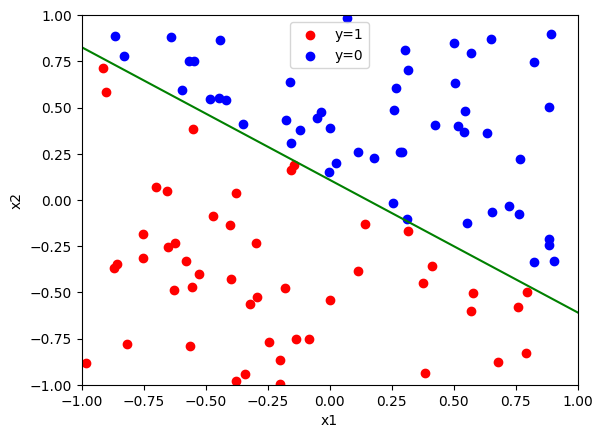

In [4]:
# Generate labels
y = (np.dot(x, w) > 0).astype(int)

# Scatter plot
plt.scatter(x[y == 1, 1], x[y == 1, 2], color='red', label='y=1')
plt.scatter(x[y == 0, 1], x[y == 0, 2], color='blue', label='y=0')

# Plot the decision boundary
x1_vals = np.linspace(-1, 1, 100)
x2_vals = -(w0_star + w1_star * x1_vals) / w2_star
plt.plot(x1_vals, x2_vals, color='green')

plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.show()

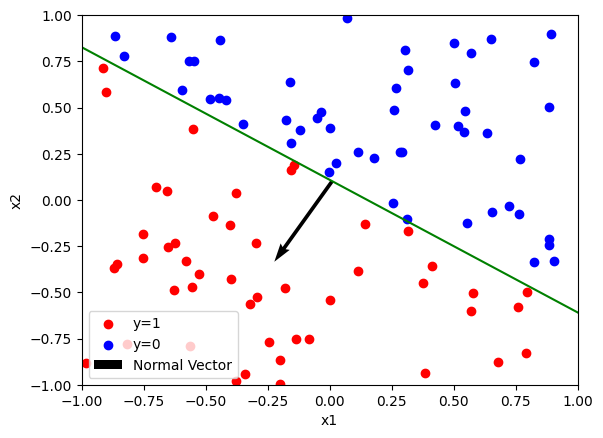

In [5]:
# Generate labels
y = (np.dot(x, w) > 0).astype(int)

# Scatter plot
plt.scatter(x[y == 1, 1], x[y == 1, 2], color='red', label='y=1')
plt.scatter(x[y == 0, 1], x[y == 0, 2], color='blue', label='y=0')

# Plot the decision boundary
x1_vals = np.linspace(-1, 1, 100)
x2_vals = -(w0_star + w1_star * x1_vals) / w2_star
plt.plot(x1_vals, x2_vals, color='green')

normal_vector = w[1:3] / np.linalg.norm(w[1:3])
midpoint_x = x1_vals[len(x1_vals) // 2]
midpoint_y = x2_vals[len(x2_vals) // 2]
plt.quiver(midpoint_x, midpoint_y, normal_vector[0], normal_vector[1], color='black', scale=5, label='Normal Vector')

plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.show()

In [6]:
eta = 1
epochs = 100
W = np.ones(3)
mistakes = list()

for j in range(epochs):  # Run for a fixed number of iterations
    mistake_count = 0
    for i in range(n):
        if (np.dot(W, x[i]) > 0) != y[i]:
            W += eta * (y[i] - (np.dot(W, x[i]) > 0)) * x[i]
            mistake_count += 1
            
    mistakes.append(mistake_count)
    if mistake_count == 0:
        print(f"The algorithm converged after {j} epochs")
        break

The algorithm converged after 24 epochs


Weight vector W: [ 1.         -5.73776788 -7.50152184]
Real w is [ 0.088 -0.581 -0.809] and Learned w is [ 0.105 -0.604 -0.79 ], with a difference of 0.035


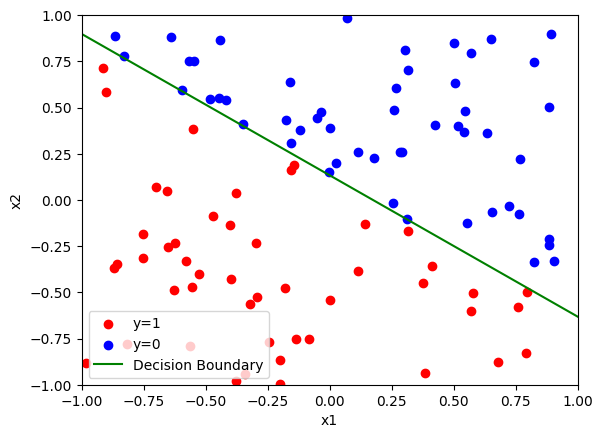

In [7]:
# Print the weight vector W
print("Weight vector W:", W)
w_normal = w / np.linalg.norm(w)
W_normal = W / np.linalg.norm(W)
diff = np.round(np.linalg.norm(w_normal - W_normal), 3)
print(f"Real w is {np.round(w_normal, 3)} and Learned w is {np.round(W_normal, 3)}, with a difference of {diff}")

# Scatter plot
plt.scatter(x[y == 1, 1], x[y == 1, 2], color='red', label='y=1')
plt.scatter(x[y == 0, 1], x[y == 0, 2], color='blue', label='y=0')

# Plot the decision boundary
x1_vals = np.linspace(-1, 1, 100)
x2_vals = -(W[0] + W[1] * x1_vals) / W[2]
plt.plot(x1_vals, x2_vals, color='green', label='Decision Boundary')

plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.show()

The algorithm converged after 27 epochs with eta = 0.1
The algorithm converged after 24 epochs with eta = 1
The algorithm converged after 32 epochs with eta = 10


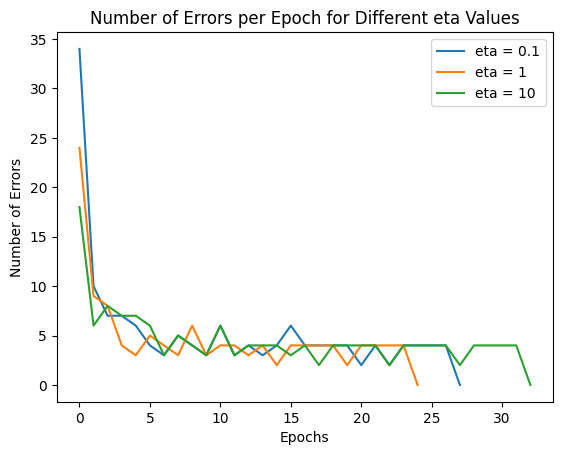

In [8]:
etas = [0.1, 1, 10]
epochs = 100
mistakes_dict = {}

for eta in etas:
    W = np.ones(3)
    mistakes = []
    
    for j in range(epochs):
        mistake_count = 0
        for i in range(n):
            if (np.dot(W, x[i]) > 0) != y[i]:
                W += eta * (y[i] - (np.dot(W, x[i]) > 0)) * x[i]
                mistake_count += 1
                
        mistakes.append(mistake_count)
        if mistake_count == 0:
            print(f"The algorithm converged after {j} epochs with eta = {eta}")
            break
    
    mistakes_dict[eta] = mistakes

# Plot the number of errors for each eta value
for eta, mistakes in mistakes_dict.items():
    plt.plot(mistakes, label=f'eta = {eta}')

plt.xlabel('Epochs')
plt.ylabel('Number of Errors')
plt.legend()
plt.title('Number of Errors per Epoch for Different eta Values')
plt.show()

The algorithm converged after 33 epochs
Weight vector W: [  2.         -13.08340925 -18.30520484]
Real w is [ 0.088 -0.581 -0.809] and Learned w is [ 0.089 -0.579 -0.81 ], with a difference of 0.002, while the previous difference was 0.035


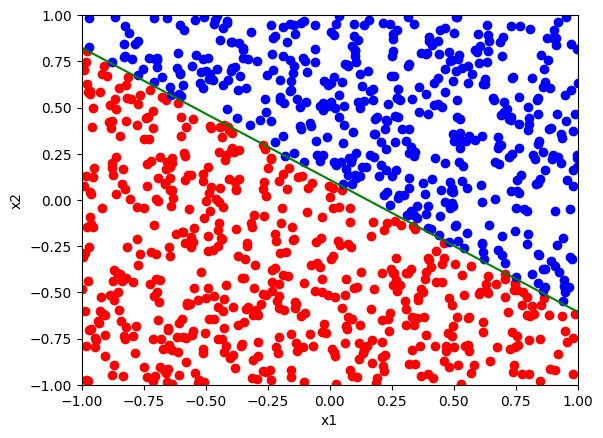

In [9]:
# Generate new samples
n = 1000
x0 = np.ones(n)
x1 = np.random.uniform(-1, 1, n)
x2 = np.random.uniform(-1, 1, n)
x = np.column_stack((x0, x1, x2))

# Generate new labels
y = (np.dot(x, w) > 0).astype(int)

# Perceptron training with new samples
eta = 1
epochs = 100
W = np.ones(3)
mistakes = list()

for j in range(epochs):  # Run for a fixed number of iterations
    mistake_count = 0
    for i in range(n):
        if (np.dot(W, x[i]) > 0) != y[i]:
            W += eta * (y[i] - (np.dot(W, x[i]) > 0)) * x[i]
            mistake_count += 1
            
    mistakes.append(mistake_count)
    if mistake_count == 0:
        print(f"The algorithm converged after {j} epochs")
        break

# Print the weight vector W
print("Weight vector W:", W)
w_normal = w / np.linalg.norm(w)
W_normal = W / np.linalg.norm(W)
print(f"Real w is {np.round(w_normal, 3)} and Learned w is {np.round(W_normal, 3)}, with a difference of {np.round(np.linalg.norm(w_normal - W_normal), 3)}, while the previous difference was {diff}")

# Scatter plot
plt.scatter(x[y == 1, 1], x[y == 1, 2], color='red', label='y=1')
plt.scatter(x[y == 0, 1], x[y == 0, 2], color='blue', label='y=0')

# Plot the decision boundary
x1_vals = np.linspace(-1, 1, 100)
x2_vals = -(W[0] + W[1] * x1_vals) / W[2]
plt.plot(x1_vals, x2_vals, color='green', label='Decision Boundary')

plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

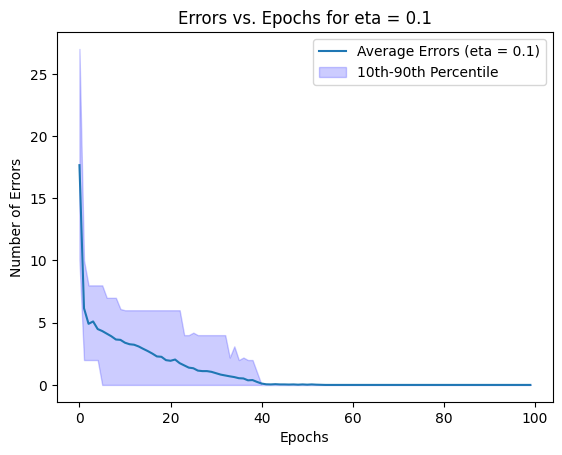

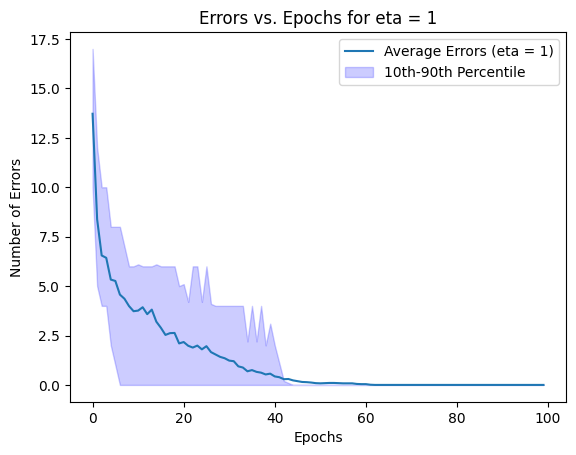

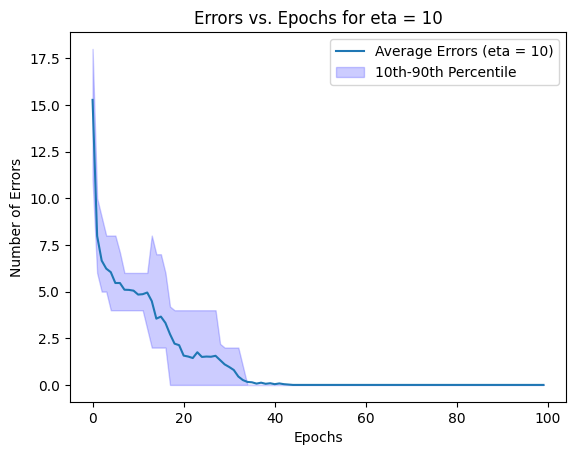

In [10]:
repetitions = 100
etas = [0.1, 1, 10]
epochs = 100
n = 100

# Initialize storage for errors
errors_per_epoch = {eta: np.zeros((repetitions, epochs)) for eta in etas}

for eta in etas:
    for rep in range(repetitions):
        W = np.random.uniform(-1, 1, 3)
        
        for j in range(epochs):
            mistake_count = 0
            for i in range(n):
                if (np.dot(W, x[i]) > 0) != y[i]:
                    W += eta * (y[i] - (np.dot(W, x[i]) > 0)) * x[i]
                    mistake_count += 1
            
            errors_per_epoch[eta][rep, j] = mistake_count
            if mistake_count == 0:
                break

# Plotting the results
for eta in etas:
    avg_errors = np.mean(errors_per_epoch[eta], axis=0)
    lower_percentile = np.percentile(errors_per_epoch[eta], 10, axis=0)
    upper_percentile = np.percentile(errors_per_epoch[eta], 90, axis=0)
    
    plt.figure()
    plt.plot(avg_errors, label=f'Average Errors (eta = {eta})')
    plt.fill_between(range(epochs), lower_percentile, upper_percentile, color='b', alpha=0.2, label='10th-90th Percentile')
    plt.xlabel('Epochs')
    plt.ylabel('Number of Errors')
    plt.legend()
    plt.title(f'Errors vs. Epochs for eta = {eta}')
    plt.show()